In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zahraahmadnezhad","key":"1633e0b95ee5afc39d39dead2724c52d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 197MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('new-york-city-airbnb-open-data.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


In [ ]:
#Read Dataset
ab_nyc = pd.read_csv('/content/files/AB_NYC_2019.csv')

In [ ]:
#checking type of every column in the dataset
ab_nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
ab_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

ابتدا نگاه میکنیم ببینیم چه ستون هایی دارای مقادیر تهی هستند.و با استفاده از این تابع متوجه میشویم چه ستون هایی دارای مقادیر از دست رفته یعنی نال هستند.

In [ ]:
ab_nyc.drop(['host_name','last_review'], axis=1, inplace=True)

با حذف ستون هایی که مهم نیستند و مدیریت داده های از دست رفته ادامه میدهیم.

In [ ]:
#checking if there is any null left in 'review_per_month' column
ab_nyc.fillna({'reviews_per_month':0}, inplace=True)

بنابرین داده های پرت و از دست رفته را پیدا کرده و پاکسازی انجام دادیم

In [ ]:
#Tedad agahi yekta
ab_nyc['id'].nunique()

48895

In [ ]:
#Tedad agahi dar har mantaghe joghrafiayi
ab_nyc.groupby('neighbourhood').count()['id'].sort_values(ascending=False)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Willowbrook              1
Fort Wadsworth           1
New Dorp                 1
Woodrow                  1
Name: id, Length: 221, dtype: int64

In [ ]:
#Tedad agahi be ezaye har neighbourhood group
ab_nyc.groupby('neighbourhood_group').count()['id'].sort_values(ascending = False)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: id, dtype: int64

منتهن و بروکلین دارای بیشترین تعداد لیست و آگهی هستند.پس این دو از مقاصد پر مسافر هستند.و پس از آنها کوئینز و برونکس و جزیره استاتن بیشترین آگهی را دارا میباشند.

In [ ]:
#10 mahale bartar ke bishtarin tedad agahi ra darand
ab_nyc.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [ ]:
#room_type
ab_nyc.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

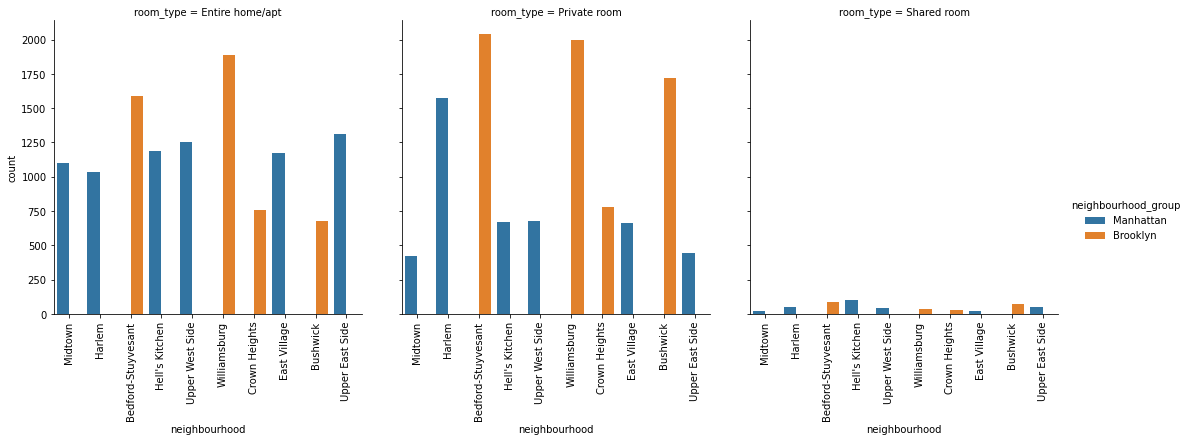

In [ ]:
#gereftan 10 mahale bartar
sub_7=ab_nyc.loc[ab_nyc['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#estefade az catplot
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

اتاق مشترک به سختی میان 10 محله مشترک موجود است.برای این 10 محله تنها 2 بخش منتهن و بروکلین نشان داده شده اند زیرا از مقاصد پرسفر هستند بنابراین بیشترین لیست و یا آگهی موجود را خواهند داشت.
  برای بخش منهتن، بدفورداستویوزانت و ویلیامزبورگ و  برای بخش بروکلین، هارلم از محبوب‌ترین‌ها هستند



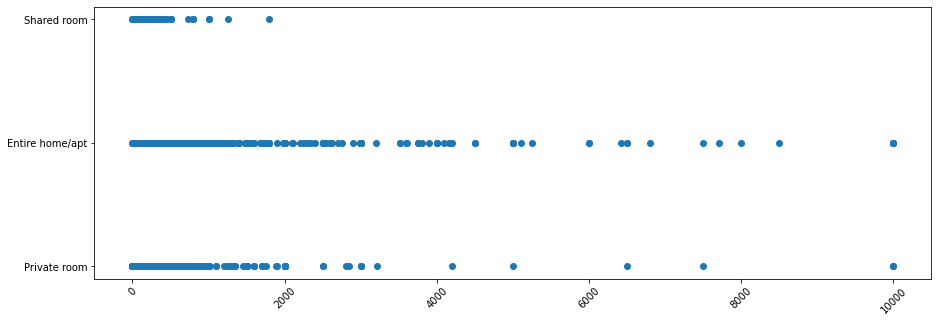

In [ ]:
plt.figure(figsize = (15,5))
plt.scatter(x=ab_nyc['price'],y=ab_nyc['room_type'])
plt.xticks(rotation=45)
plt.show()

همانطور که مشاهده میشود اتاق مشترک نسبت به اتاق خصوصی و کل خانه دارای قیمت بسیار کمتری است.
توزیع قیمت در کل خانه نسبت به اتاق خصوصی بهتر است.
در اتاق خصوصی قیمت از حدود 8000 یکباره به 10000 میرسد.

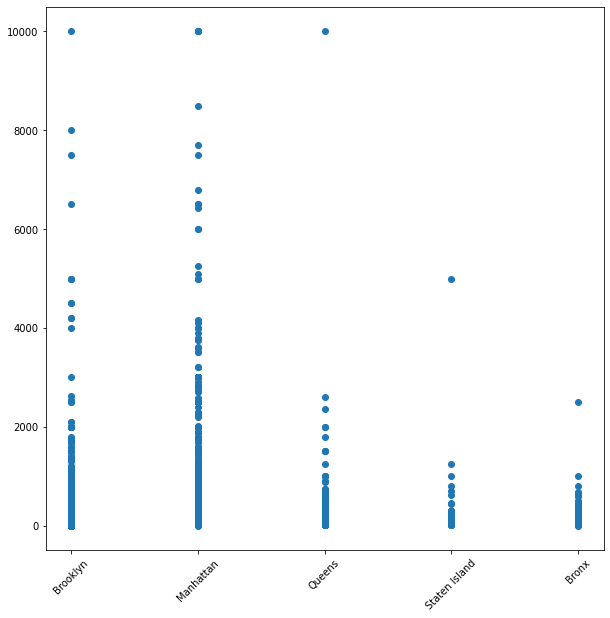

In [ ]:
#tozie gheimat be ezaye har neighbourhood group
plt.figure(figsize = (10,10))
plt.scatter(x=ab_nyc['neighbourhood_group'],y=ab_nyc['price'])
plt.xticks(rotation=45)
plt.show()

منتهن و بروکلین و کوئینز به نسبت دارای قیمت بالاتری هستند.
قیمت در کوئیتز از حدود 3000 یکباره به 10000 میرسد ولی در منتهن و بروکلین از توزیع خوبی برخوردار است.

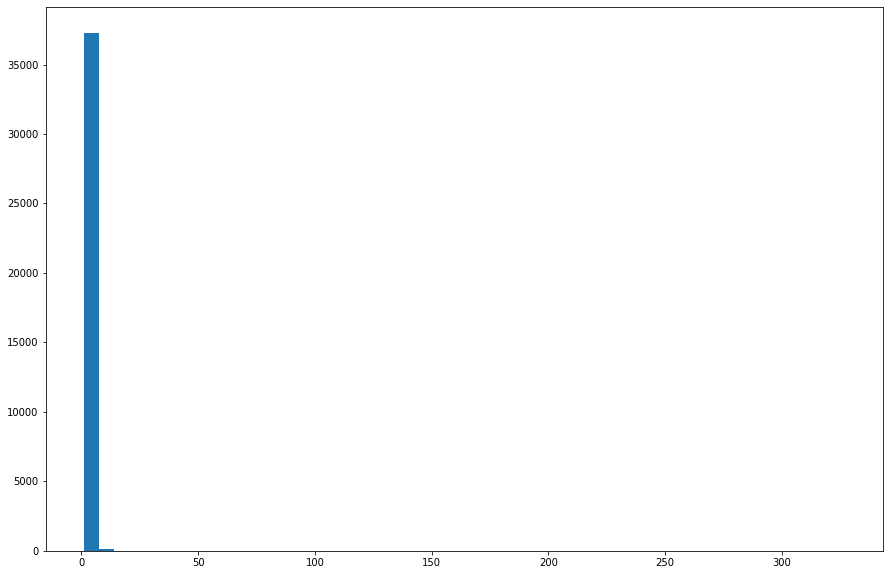

In [ ]:
# host_house
host_house = ab_nyc.groupby('host_id').count()['id'].reset_index()
host_house_count = host_house['id'].value_counts()
plt.figure(figsize = (15,10))
plt.hist(host_house['id'], bins = 50)
plt.show()


In [ ]:
host_house_count

1      32303
2       3329
3        951
4        360
5        169
6         95
7         57
8         52
9         26
10        21
12        15
13        10
11        10
15         5
14         5
17         4
23         3
18         3
33         3
31         2
20         2
34         2
25         2
96         2
28         2
49         2
52         2
29         1
232        1
27         1
30         1
327        1
65         1
47         1
103        1
50         1
39         1
21         1
91         1
19         1
121        1
43         1
16         1
87         1
37         1
26         1
32         1
Name: id, dtype: int64

In [ ]:
top_host=ab_nyc.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

این میزبان ها بیشترین تعداد آگهی در این پلتفرم را دارند و از این سرویس بیشترین استفاده را انجام میدهند

In [ ]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


بین 10 میزبان برتر و بیشترین تعداد آگهی ها توزیع خوبی وجود دارد.تعداد آگهی های میزبان اول بیش از 300 است.

[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

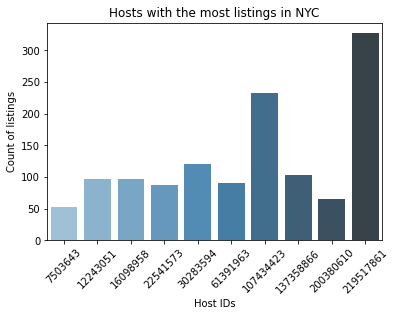

In [ ]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

در اینجا روی نمودار مشاهده میکنیم که میزبان برتر دارای بیشترین تعداد آگهی است که این تعداد بیشتر از 300 است.میزبان بعدی بیشتر از 200است و میزبان سوم و چهارم بیشتر از 100 آگهی دارند.اما از میزبان پنجم به بعد دارای تعداد آگهی کمتر از 100 عدد هستند.

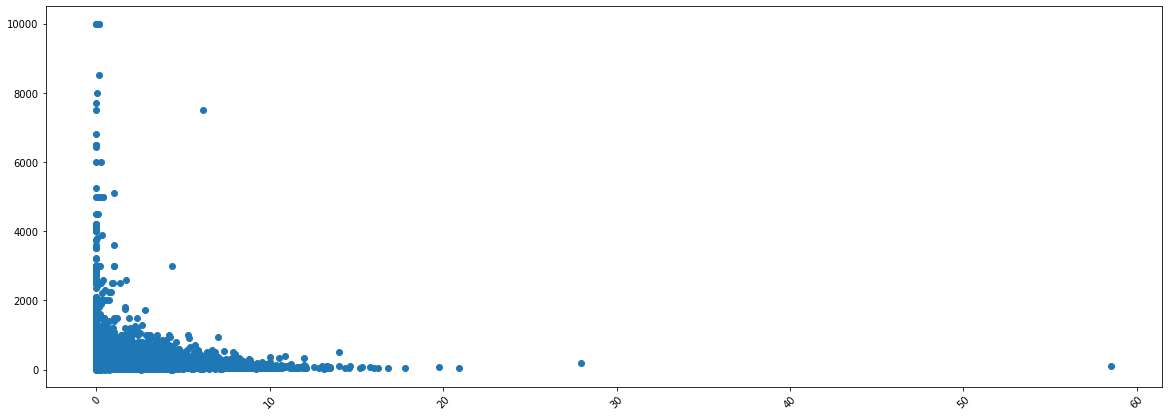

In [ ]:
plt.figure(figsize = (20,7))
plt.scatter(x=ab_nyc['reviews_per_month'],y=ab_nyc['price'])
plt.xticks(rotation=45)
plt.show()

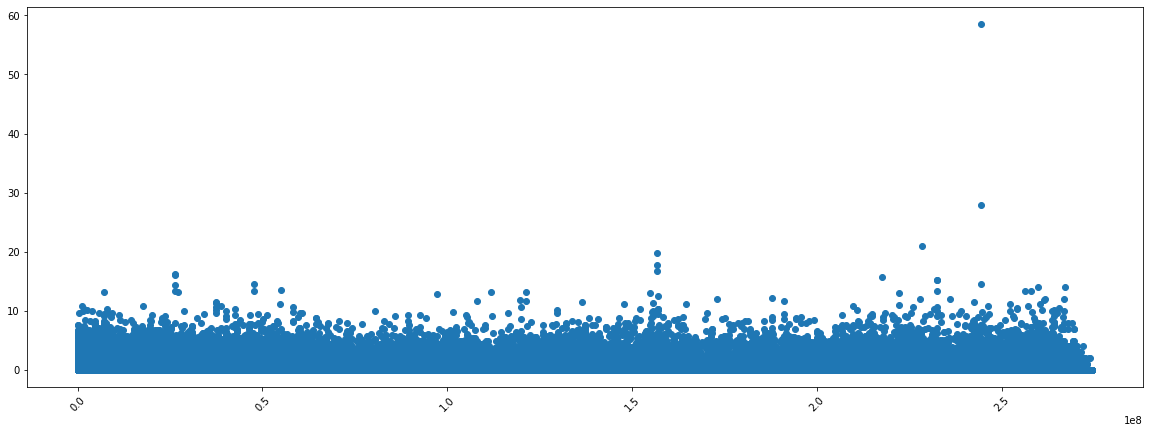

In [ ]:
plt.figure(figsize = (20,7))
plt.scatter(x=ab_nyc['host_id'],y=ab_nyc['reviews_per_month'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
ab_nyc['calculated_host_listings_count'].value_counts().reset_index().sort_values(by='index')

,index,calculated_host_listings_count
0,1,32303
1,2,6658
2,3,2853
3,4,1440
4,5,845
5,6,570
7,7,399
6,8,416
9,9,234
11,10,210


In [ ]:
#Kasani ke bishtarin tedad comment ro gereftan
hosts_with_high_customers = ab_nyc.groupby('host_id').sum()['reviews_per_month'].reset_index().sort_values(by='reviews_per_month',ascending = False).iloc[:10]
hosts_with_high_customers.head()

,host_id,reviews_per_month
34646,219517861,397.56
35825,244361589,111.72
35407,232251881,80.63
18636,26432133,68.02
31070,137274917,62.89


In [ ]:
high_customers_agahi = ab_nyc[ab_nyc['host_id'].isin(hosts_with_high_customers['host_id'])]
high_customers_agahi.groupby(['host_id','neighbourhood_group']).count().sort_values(by='id', ascending = False)['id']

host_id    neighbourhood_group
219517861  Manhattan              327
224414117  Manhattan               30
344035     Brooklyn                13
137274917  Manhattan               12
244361589  Manhattan                9
232251881  Queens                   8
156948703  Queens                   6
26432133   Queens                   5
37312959   Queens                   5
156684502  Queens                   3
Name: id, dtype: int64

ده میزبان اولی که بیشترین تعداد ریویو و کامنت را داشتند یعنی بیشترین تعداد مشتری را داشتند.

In [ ]:
high_customers_agahi.groupby('neighbourhood_group').count()['id'].reset_index().sort_values(by='id')

,neighbourhood_group,id
0,Brooklyn,13
2,Queens,27
1,Manhattan,378


In [ ]:
high_customers_agahi.groupby(['neighbourhood_group']).mean()['price']

neighbourhood_group
Brooklyn      74.615385
Manhattan    244.322751
Queens        60.000000
Name: price, dtype: float64

In [ ]:
ab_nyc[ab_nyc['price'] < 1000].groupby(['neighbourhood_group']).mean()['price']

neighbourhood_group
Bronx             84.443526
Brooklyn         117.235564
Manhattan        177.366747
Queens            94.528038
Staten Island     96.148649
Name: price, dtype: float64

In [ ]:
high_customers_agahi.groupby(['room_type']).count()['id']

room_type
Entire home/apt    321
Private room        93
Shared room          4
Name: id, dtype: int64

In [ ]:
#high customers minimum reserv nights
high_customers_agahi.groupby(['minimum_nights']).count()['id'].reset_index().sort_values(by='id',ascending=False)

,minimum_nights,id
1,2,190
2,29,137
0,1,91


In [ ]:
#minimum reserv nights
ab_nyc.groupby(['minimum_nights']).count()['id'].reset_index().sort_values(by='id',ascending=False).head(5)

,minimum_nights,id
0,1,12720
1,2,11696
2,3,7999
29,30,3760
3,4,3303


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


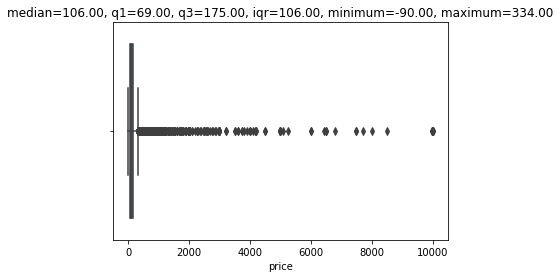

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


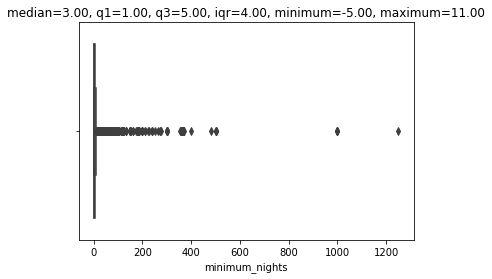

In [ ]:
for column in ['price', 'minimum_nights']:
    box_and_whisker(ab_nyc, column)

price has 0 outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


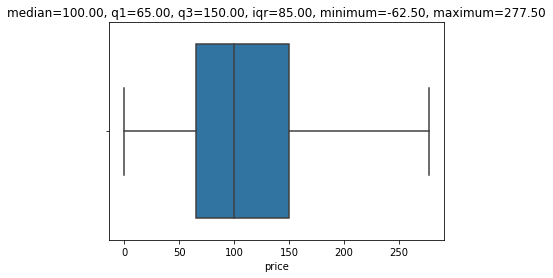

minimum_nights has 0 outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


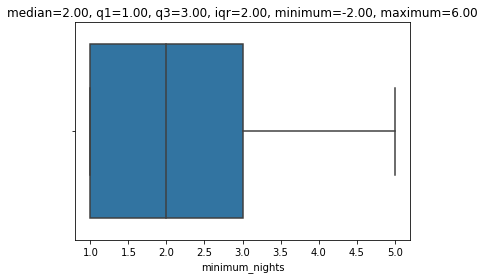

In [ ]:
for column in ['price', 'minimum_nights']:
    ab_nyc = remove_all_outliers(ab_nyc, column)
    print(f"{column} has {count_outliers(ab_nyc, column)} outliers")
    box_and_whisker(ab_nyc, column)

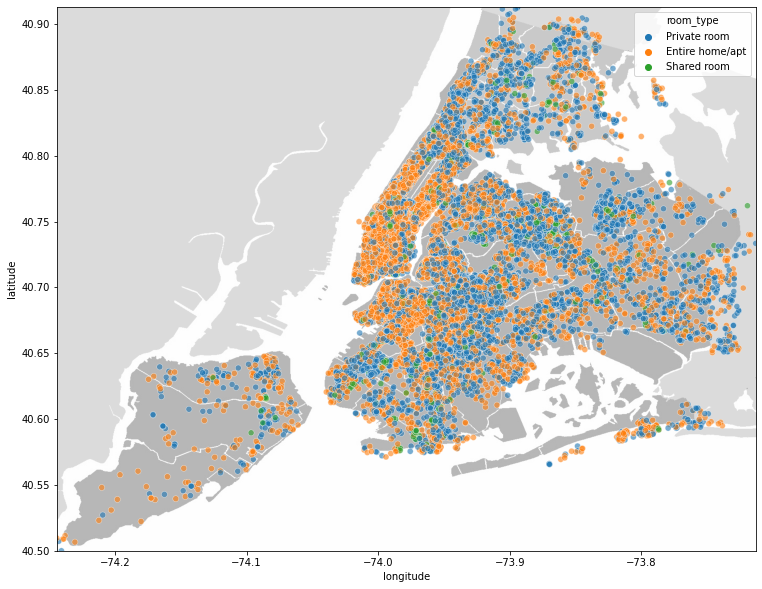

In [29]:
import matplotlib.image as mpimg
city_img=mpimg.imread('/content/files/New_York_City_.png', 0.2)
plt.figure(figsize=(20, 10))
plt.imshow(city_img, extent= [-74.244420, -73.712990, 40.499790, 40.913060], alpha=0.5)
sns.scatterplot(x='longitude',  y='latitude', hue = "room_type", data=ab_nyc, alpha = 0.6);